<a href="https://colab.research.google.com/github/ZakariaBOUZIT/random.datascience/blob/main/TP2_Neural_Networks_BOUZIT_Z.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Programming the Network**

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import figure

#utilities
def sigmoid(x):
  a = 1
  return 1/(1+math.exp(-a*x))
def sigmoid_diff(x):
  diff = sigmoid(x)*(1-sigmoid(x))
  return diff

In [ ]:
def neuralNet(x, t, w):
  #forward pass
  w0, w1, w2, w3, w4, w5, w6, w7 = w[0], w[1], w[2], w[3], w[4], w[5], w[6], w[7] 
  G0, G1, G2, G3, G4, G5, G6, G7 = 0, 0, 0, 0, 0, 0, 0, 0
  x1, x2, t1, t2 = x[0], x[1], t[0], t[1]
  h1in = w0*x1 + w2*x2
  h2in = w1*x1 + w3*x2
  h1o = sigmoid(h1in)
  h2o = sigmoid(h2in)
  y1in = w4*h1o + w6*h2o
  y2in = w5*h1o + w7*h2o
  y1o = sigmoid(y1in)
  y2o = sigmoid(y2in)
  loss = (y1o - t1)*(y1o - t1) + (y2o - t2)*(y2o - t2)
  saved_w = np.array([[w0],[w1],[w2],[w3],[w4],[w5],[w6],[w7]])
  #compute gradient
  G4 = 2*(y1o-t1)*sigmoid_diff(y1in)*h1o
  G5 = 2*(y2o-t2)*sigmoid_diff(y2in)*h1o
  G6 = 2*(y1o-t1)*sigmoid_diff(y1in)*h2o
  G7 = 2*(y2o-t2)*sigmoid_diff(y2in)*h2o
  G0 = 2*(y1o-t1)*sigmoid_diff(y1in)*w4*sigmoid_diff(h1in)*x1 + 2*(y2o-t2)*sigmoid_diff(y2in)*w5*sigmoid_diff(h1in)*x1 
  G1 = 2*(y1o-t1)*sigmoid_diff(y1in)*w6*sigmoid_diff(h2in)*x1 + 2*(y2o-t2)*sigmoid_diff(y2in)*w7*sigmoid_diff(h2in)*x1
  G2 = 2*(y1o-t1)*sigmoid_diff(y1in)*w4*sigmoid_diff(h1in)*x2 + 2*(y2o-t2)*sigmoid_diff(y2in)*w5*sigmoid_diff(h1in)*x2
  G3 = 2*(y1o-t1)*sigmoid_diff(y1in)*w6*sigmoid_diff(h2in)*x2 + 2*(y2o-t2)*sigmoid_diff(y2in)*w7*sigmoid_diff(h2in)*x2
  return G0, G1, G2, G3, G4, G5, G6, G7, loss, saved_w

In [ ]:
x1 = np.array([[2],[1]])
t1 = np.array([[1],[0]])
x2 = np.array([[-1],[3]])
t2 = np.array([[0],[1]])
w = np.array([[2],[-3],[-3],[4],[1],[-1],[0.25],[2]])
G0, G1, G2, G3, G4, G5, G6, G7, loss1, _= neuralNet(x1, t1, w)
G1_ = [G0, G1, G2, G3, G4, G5, G6, G7]
G0, G1, G2, G3, G4, G5, G6, G7, loss2, _= neuralNet(x2, t2, w)
G2_ = [G0, G1, G2, G3, G4, G5, G6, G7]
print('loss 1:', loss1)
print('loss 2:', loss2)
print('--------------------------------')
print('Gradient of loss1 :', G1_)
print('Gradient of loss2 :', G2_)

loss 1: [0.24526146]
loss 2: [0.33025679]
--------------------------------
Gradient of loss1 : [array([-0.12457999]), array([0.06774106]), array([-0.06229]), array([0.03387053]), array([-0.1010608]), array([0.13055096]), array([-0.01647849]), array([0.02128702])]
Gradient of loss2 : [array([-5.03998461e-06]), array([-5.84951168e-09]), array([1.51199538e-05]), array([1.7548535e-08]), array([4.6220022e-06]), array([-4.18066587e-07]), array([0.27674295]), array([-0.02503179])]


# **Training and testing the Network**

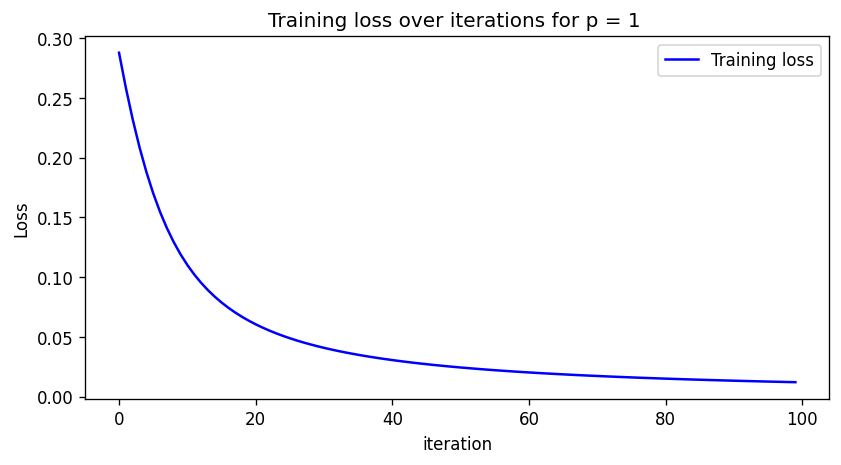

obtained loss for x3 [1.7075058]


In [ ]:
loss = [0,0]
loss_epoch = []
G0 = [0,0]
G1 = [0,0]
G2 = [0,0]
G3 = [0,0]
G4 = [0,0]
G5 = [0,0]
G6 = [0,0]
G7 = [0,0]

w = np.array([[2],[-3],[-3],[4],[1],[-1],[0.25],[2]])
w0, w1, w2, w3, w4, w5, w6, w7 = w[0], w[1], w[2], w[3], w[4], w[5], w[6], w[7] 

N_iterations = 100
p = 1

x1 = np.array([[2],[1]])
t1 = np.array([[1],[0]])
x2 = np.array([[-1],[3]])
t2 = np.array([[0],[1]])

for iteration in range(N_iterations):
  G0[0], G1[0], G2[0], G3[0], G4[0], G5[0], G6[0], G7[0], loss[0], _ = neuralNet(x1, t1, w)
  G0[1], G1[1], G2[1], G3[1], G4[1], G5[1], G6[1], G7[1], loss[1], _ = neuralNet(x2, t2, w)
  w0 = w0 - p* np.mean(G0)
  w1 = w1 - p* np.mean(G1)
  w2 = w2 - p* np.mean(G2)
  w3 = w3 - p* np.mean(G3)
  w4 = w4 - p* np.mean(G4)
  w5 = w5 - p* np.mean(G5)
  w6 = w6 - p* np.mean(G6)
  w7 = w7 - p* np.mean(G7)
  w = np.array([[w0], [w1], [w2], [w3], [w4], [w5], [w6], [w7]])
  loss_epoch.append(np.mean(loss))

epochs = range(0,N_iterations)
figure(figsize=(8, 4), dpi=120)
plt.plot(epochs, loss_epoch, 'b', label='Training loss')
plt.title('Training loss over iterations for p = 1 ')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()

#test with x3
x3 = np.array([[1],[4]])
t3 = np.array([[1],[0]])  
#test on x3 with the trained weights 
G0, G1, G2, G3, G4, G5, G6, G7, loss_test, _ = neuralNet(x3, t3, w)
print('obtained loss for x3',loss_test)

# **Training and testing on large dataset**

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data = pd.read_csv('gdrive/MyDrive/traindatann.data')
x1 = data.iloc[:,0]
x2 = data.iloc[:,1]
t1 = data.iloc[:,2]
t2 = data.iloc[:,3]

In [ ]:
w = np.array([[2],[-3],[-3],[4],[1],[-1],[0.25],[2]])
w0, w1, w2, w3, w4, w5, w6, w7 = w[0], w[1], w[2], w[3], w[4], w[5], w[6], w[7] 
batch_size = 40
iterations = 40
loss_epoch = []
loss_batch = []
loss_sample = []
G0 = []
G1 = []
G2 = []
G3 = []
G4 = []
G5 = []
G6 = []
G7 = []

p = 1

for iteration in range(iterations):
  loss_sample = []
  begin = 0
  end = batch_size
  for j in range(int(200/batch_size)):
    for i in range(begin, end): 
      g0,g1,g2,g3,g4,g5,g6,g7,l,_ = neuralNet(np.array([x1[i],x2[i]]) , np.array([t1[i],t2[i]]) , w)
      G0.append(g0) 
      G1.append(g1) 
      G2.append(g2) 
      G3.append(g3) 
      G4.append(g4) 
      G5.append(g5) 
      G6.append(g6)
      G7.append(g7) 
      loss_sample.append(l)

    loss_batch.append(np.mean(loss_sample))
    begin = begin + batch_size
    end = end + batch_size
  
    w0 = w0 - p* np.mean(G0)
    w1 = w1 - p* np.mean(G1)
    w2 = w2 - p* np.mean(G2)
    w3 = w3 - p* np.mean(G3)
    w4 = w4 - p* np.mean(G4)
    w5 = w5 - p* np.mean(G5)
    w6 = w6 - p* np.mean(G6)
    w7 = w7 - p* np.mean(G7)
    w = np.array([[w0], [w1], [w2], [w3], [w4], [w5], [w6], [w7]])
  
  loss_epoch.append(np.mean(loss_batch)) 

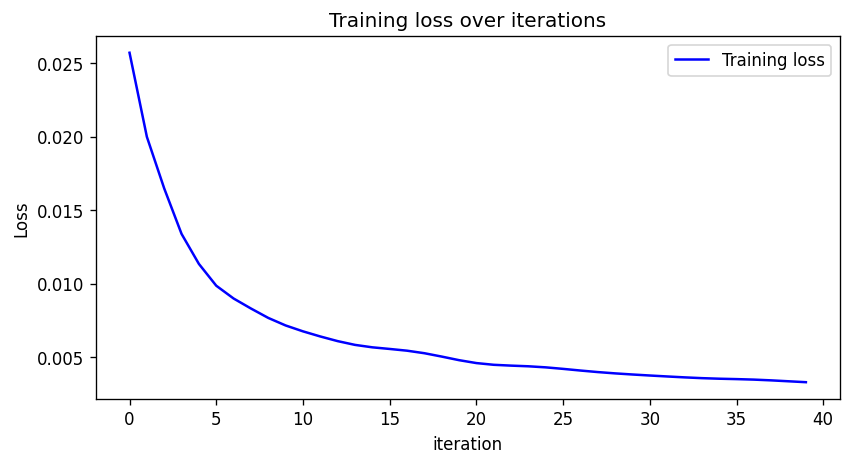

In [ ]:
epochs = range(0,iterations)
figure(figsize=(8, 4), dpi=120)
plt.plot(epochs, loss_epoch, 'b', label='Training loss')
plt.title('Training loss over iterations')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
test_data = pd.read_csv('gdrive/MyDrive/testdatann.data')
x1t = test_data.iloc[:,0]
x2t = test_data.iloc[:,1]
t1t = test_data.iloc[:,2]
t2t = test_data.iloc[:,3]

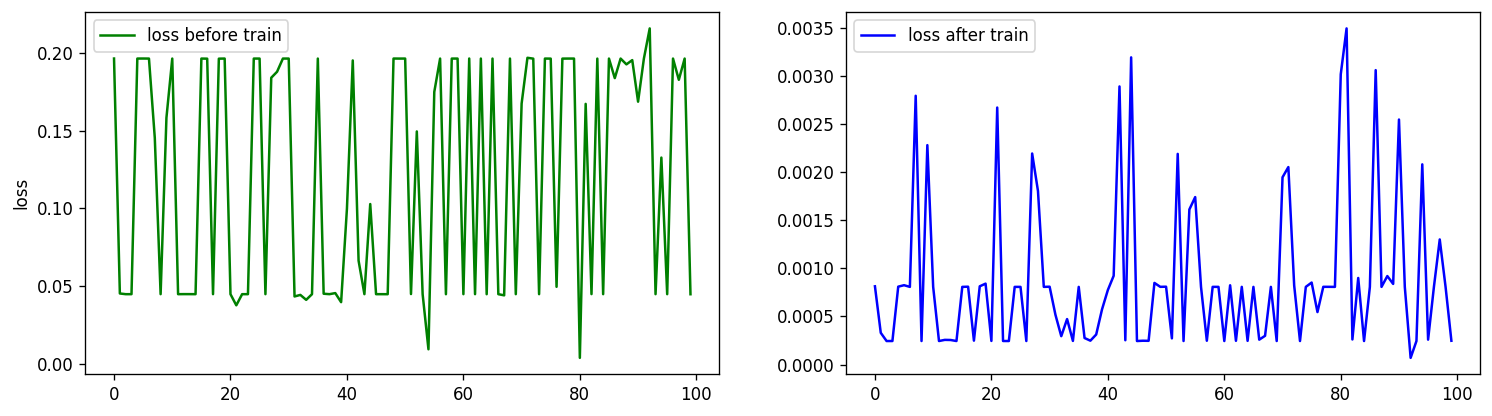

In [ ]:
losses1 = []
losses2 = []

w_old = np.array([[2],[-3],[-3],[4],[1],[-1],[0.25],[2]])

for i in range(len(x1t)):
  g0,g1,g2,g3,g4,g5,g6,g7,loss_test1,_ = neuralNet(np.array([x1t[i],x2t[i]]) , np.array([t1t[i],t2t[i]]) , w)
  losses1.append(loss_test1)


for i in range(len(x1t)):
  g0,g1,g2,g3,g4,g5,g6,g7,loss_test2,_ = neuralNet(np.array([x1t[i],x2t[i]]) , np.array([t1t[i],t2t[i]]) , w_old)
  losses2.append(loss_test2)

x = range(0,len(losses1))
figure(figsize=(15, 4), dpi=120)
plt.subplot(1, 2, 1)
plt.plot(x, losses2, 'g', label='loss before train')
plt.legend()
plt.ylabel('loss')

plt.subplot(1, 2, 2)
plt.plot(x, losses1, 'b', label='loss after train')
plt.legend()


plt.show()